<a href="https://colab.research.google.com/github/Praharshita23/Elevate_labs_task_7/blob/main/task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
cursor.execute("""
CREATE TABLE sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [4]:
sales_data = [
    ("Pen", 10, 5),
    ("Book", 5, 50),
    ("Pencil", 20, 2),
    ("Pen", 7, 5),
    ("Book", 3, 50)
]

cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", sales_data)

conn.commit()

In [5]:
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)

In [6]:
print(df)

  product  total_qty  revenue
0    Book          8    400.0
1     Pen         17     85.0
2  Pencil         20     40.0


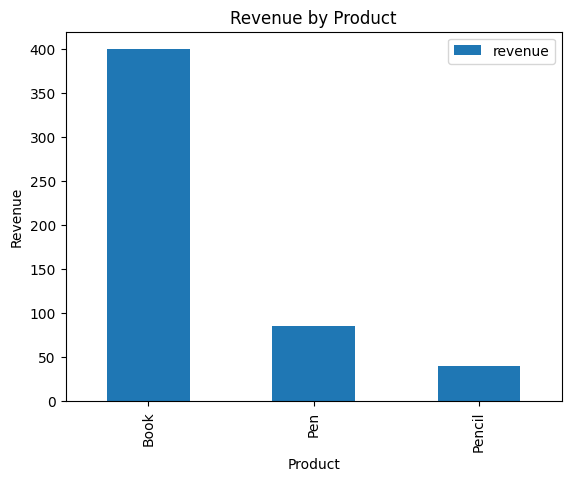

In [9]:
df.plot(kind='bar', x='product', y='revenue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")

plt.savefig("sales_chart.png")
plt.show()

In [8]:
plt.savefig("sales_chart.png")

<Figure size 640x480 with 0 Axes>